# Imports:

In [1]:
# import the necessary packages
from imutils.perspective import four_point_transform
from imutils import contours
import imutils
import cv2

%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook
import matplotlib.pyplot as plt

# Image segmentation:

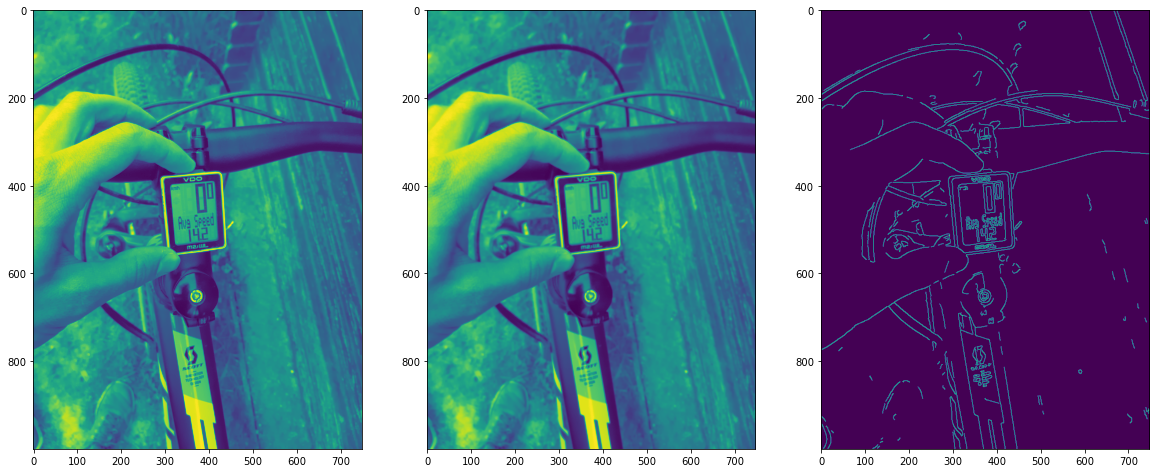

In [31]:

path = './20191026_142122.jpg'
# path = './20190925_184008.jpg'
path = './20200911_190211_thumb.jpg'
path = './20200507_191123.jpg'
# load the example image
image = cv2.imread(path)
# pre-process the image by resizing it, converting it to
# graycale, blurring it, and computing an edge map
image = imutils.resize(image, height=1000)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 100, 150, 255,)
# edged = cv2.Canny(blurred, 200, 255, 255,)

# cv2.imshow("Input", image)
# cv2.imshow("Output", output)

#Show the image with matplotlib
fig, ax = plt.subplots(1,3,figsize=(20,16))s
ax[0].imshow(gray)
ax[1].imshow(blurred)
ax[2].imshow(edged)
fig.show()


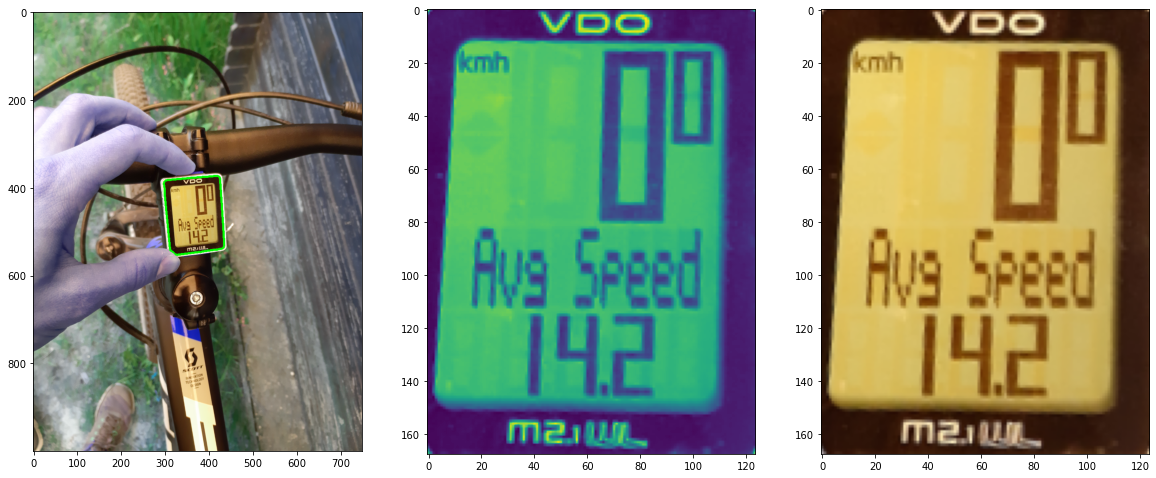

In [34]:
# find contours in the edge map, then sort them by their
# size in descending order
# contours, hierarchy  = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy  = cv2.findContours(edged.copy(), mode=cv2.RETR_EXTERNAL,method=cv2.CHAIN_APPROX_NONE)
# contours, hierarchy  = cv2.findContours(edged.copy(), mode=cv2.RETR_TREE,method=cv2.CHAIN_APPROX_NONE)

# cnts = imutils.grab_contours(cnts)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

displayCnt = None
# loop over the contours
for i,c in enumerate(contours):
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    # if the contour has four vertices, then we have found
    # the thermostat display
    if len(approx) == 4:
        displayCnt = approx
        break
detected_contour = contours[i].copy()
warped = four_point_transform(gray, displayCnt.reshape(4, 2))
output = four_point_transform(image, displayCnt.reshape(4, 2))

image_with_contour =image.copy()
cv2.drawContours(image_with_contour, detected_contour, -1, (0, 255, 0), 3)

fig, ax = plt.subplots(1,3,figsize=(20,16))

ax[0].imshow(image_with_contour)
ax[1].imshow(warped)
ax[2].imshow(output)

fig.show()